In [2]:
pip install tensorflow keras numpy pandas matplotlib seaborn opencv-python streamlit scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Importing Libraries

import tensorflow as tf
import streamlit as st
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0

In [79]:
# Extract the ZIP File

import zipfile

zip_path = "/Users/arul/Documents/VASUKI/projects/Dataset.zip"
extract_path = "/Users/arul/Documents/VASUKI/projects/Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [72]:
# Use Correct Paths for Training and Validation Data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the extracted dataset folders
train_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

# Data augmentation and rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_data = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [11]:
test_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

test_data = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle test data to keep labels in order
)


Found 3187 images belonging to 11 classes.


In [12]:
# Visualizing and Understanding Data

# Check Class Distribution

import os

# Define dataset paths
train_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Function to count images per class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

# Count images in each dataset
train_counts = count_images(train_path)
val_counts = count_images(val_path)
test_counts = count_images(test_path)

print("Training Data:", train_counts)
print("Validation Data:", val_counts)
print("Test Data:", test_counts)


# Why is this important?

# If any class has significantly fewer images, model might be biased.
# We may need data augmentation for balancing.


Training Data: {'fish sea_food shrimp': 576, 'fish sea_food trout': 580, 'fish sea_food gilt_head_bream': 566, 'fish sea_food red_sea_bream': 571, 'fish sea_food red_mullet': 579, 'fish sea_food sea_bass': 538, 'fish sea_food black_sea_sprat': 569, 'fish sea_food hourse_mackerel': 573, 'fish sea_food striped_red_mullet': 547, 'animal fish': 1096, 'animal fish bass': 30}
Validation Data: {'fish sea_food shrimp': 100, 'fish sea_food trout': 98, 'fish sea_food gilt_head_bream': 94, 'fish sea_food red_sea_bream': 113, 'fish sea_food red_mullet': 90, 'fish sea_food sea_bass': 97, 'fish sea_food black_sea_sprat': 105, 'fish sea_food hourse_mackerel': 97, 'fish sea_food striped_red_mullet': 101, 'animal fish': 187, 'animal fish bass': 10}
Test Data: {'fish sea_food shrimp': 289, 'fish sea_food trout': 292, 'fish sea_food gilt_head_bream': 305, 'fish sea_food red_sea_bream': 273, 'fish sea_food red_mullet': 291, 'fish sea_food sea_bass': 327, 'fish sea_food black_sea_sprat': 298, 'fish sea_foo

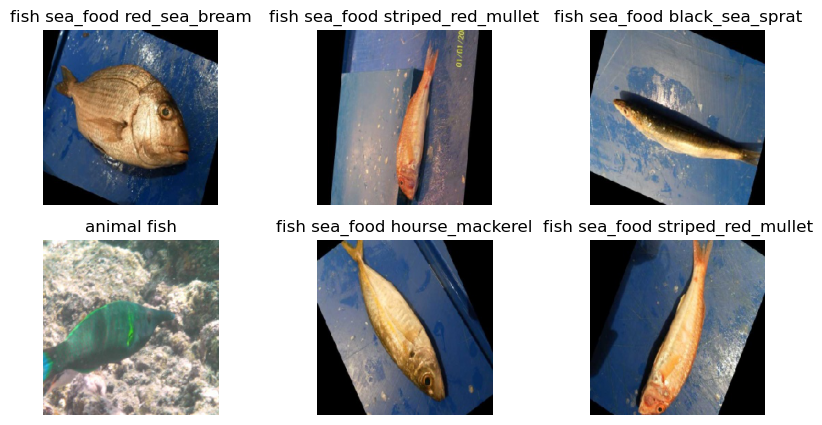

In [14]:
# Visualize Sample Images from the Dataset

import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the training dataset
images, labels = next(train_data)

# Define class names from the dataset
class_names = list(train_data.class_indices.keys())

# Display a few images with their class names
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])  # Get class label
    plt.axis('off')

plt.show()

# What should check here?

# Make sure images are correctly labeled.
# Look for any issues (blurry images, incorrect class distribution).


In [16]:
# Data Augmentation (Improve Model Robustness)


# Modify ImageDataGenerator to include augmentation techniques:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotate images randomly by 20 degrees
    width_shift_range=0.2,   # Shift image width by 20%
    height_shift_range=0.2,  # Shift image height by 20%
    shear_range=0.2,         # Shearing transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill empty pixels after transformation
)

# Apply augmentation only to training data
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# If dataset has less data per class, apply data augmentation to artificially increase the number of images.


Found 6225 images belonging to 11 classes.


In [17]:
# Train a CNN Model from Scratch

# Define the CNN Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)), # Conv2D: Extracts features from images.
    MaxPooling2D(2,2), # MaxPooling2D: Reduces spatial dimensions to improve efficiency.

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(), # Flatten: Converts the 2D feature maps into a 1D vector.


    Dense(128, activation='relu'), # Dense Layer: Fully connected layers for classification.
    Dropout(0.5), # Dropout: Prevents overfitting.

    Dense(len(train_data.class_indices), activation='softmax')  # Output layer (Number of classes)
]) # Softmax Output Layer: Predicts probability distribution for multiple classes.

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()


/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the CNN Model

history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Start with 10 epochs, increase if needed
)


Epoch 1/10


/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 127s 640ms/step - accuracy: 0.2151 - loss: 2.3053 - val_accuracy: 0.5092 - val_loss: 1.4561
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.4385 - loss: 1.5213 - val_accuracy: 0.6484 - val_loss: 1.0939
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 127s 643ms/step - accuracy: 0.5224 - loss: 1.2757 - val_accuracy: 0.6767 - val_loss: 0.9026
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 139s 704ms/step - accuracy: 0.5837 - loss: 1.1182 - val_accuracy: 0.7344 - val_loss: 0.7671
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 178s 904ms/step - accuracy: 0.6251 - loss: 1.0097 - val_accuracy: 0.7592 - val_loss: 0.7077
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 694ms/step - accuracy: 0.6467 - loss: 0.9384 - val_accuracy: 0.7592 - val_loss: 0.6548
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6755 - loss: 0.8629 - val_accuracy: 0.8095 - val_loss: 0.5281
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 166s 842ms/step - accuracy: 0.7248 - loss: 0.7374 - v

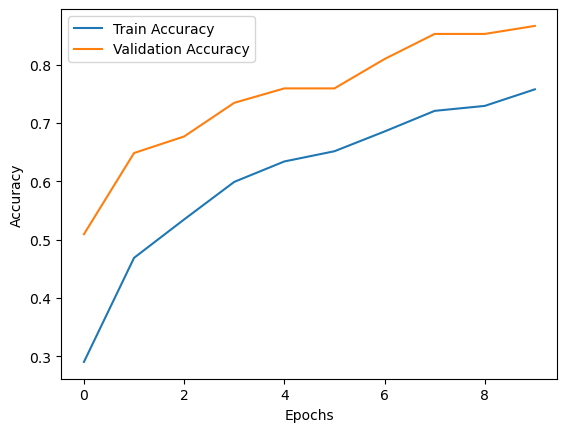

In [19]:
# Evaluate Model Performance

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Train Pre-Trained Models (Transfer Learning)

# Why Use Pre-Trained Models?

# Pre-trained models are trained on millions of images (ImageNet dataset), so they extract better features than a CNN trained from scratch.
# They help in achieving higher accuracy with less data.
# We use transfer learning by taking a pre-trained model and fine-tuning it on our fish dataset.


In [22]:
# Load and Fine-Tune a Pre-Trained Model

# VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (so they don’t get updated during training)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fish classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use Global Average Pooling instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)  # Output layer

# Create final model
model_vgg16 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg16.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 134,155 (524.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# Train the Pre-Trained Model

history_vgg16 = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Adjust based on results
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1193s 6s/step - accuracy: 0.1276 - loss: 2.5383 - val_accuracy: 0.3342 - val_loss: 2.0261
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1174s 6s/step - accuracy: 0.2914 - loss: 2.0547 - val_accuracy: 0.6108 - val_loss: 1.7864
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1170s 6s/step - accuracy: 0.4112 - loss: 1.8165 - val_accuracy: 0.6291 - val_loss: 1.6180
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1230s 6s/step - accuracy: 0.4818 - loss: 1.6615 - val_accuracy: 0.7088 - val_loss: 1.4733
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1635s 8s/step - accuracy: 0.5469 - loss: 1.5289 - val_accuracy: 0.7088 - val_loss: 1.3504
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1494s 8s/step - accuracy: 0.6045 - loss: 1.4100 - val_accuracy: 0.7308 - val_loss: 1.2379
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1395s 7s/step - accuracy: 0.6210 - loss: 1.3208 - val_accuracy: 0.7518 - val_loss: 1.1501
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1377s 7s/step - accuracy: 0.6545 - loss: 1.2270 - 

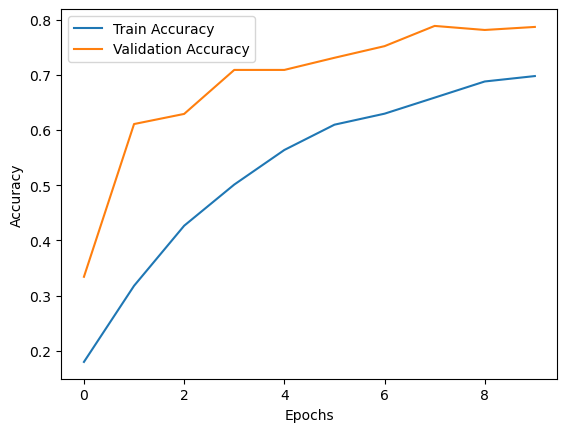

In [24]:
# Evaluate VGG16 Model Performance

import matplotlib.pyplot as plt

plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
# Pre-Trained Model: ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_resnet50 = Model(inputs=base_model.input, outputs=output_layer)
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_resnet50.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,115,083 (91.99 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=32
)

# Save the trained model
model_resnet50.save("resnet50_fish_model.h5")


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.2249 - loss: 2.1233 - val_accuracy: 0.2619 - val_loss: 2.0539
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2452 - loss: 2.1001 - val_accuracy: 0.2628 - val_loss: 2.0295
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.2384 - loss: 2.0976 - val_accuracy: 0.2756 - val_loss: 2.0240
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.2511 - loss: 2.0728 - val_accuracy: 0.2793 - val_loss: 2.0212
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 755s 4s/step - accuracy: 0.2640 - loss: 2.0567 - val_accuracy: 0.3223 - val_loss: 2.0001
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.2512 - loss: 2.0666 - val_accuracy: 0.2720 - val_loss: 2.0063
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.2543 - loss: 2.0672 - val_accuracy: 0.3040 - val_loss: 1.9800
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.2639 - loss: 2.0393 - val_accu

35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 932ms/step - accuracy: 0.3252 - loss: 1.9741
ResNet50 Model - Validation Accuracy: 0.3196, Loss: 1.9615


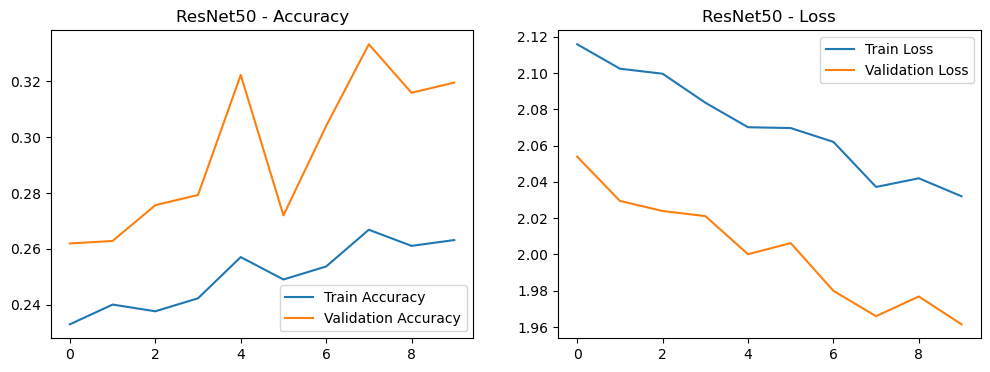

35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.18      0.28      0.22       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.04      0.01      0.02        94
   fish sea_food hourse_mackerel       0.11      0.10      0.10        97
        fish sea_food red_mullet       0.12      0.19      0.14        90
     fish sea_food red_sea_bream       0.13      0.03      0.04       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.15      0.08      0.10       100
fish sea_food striped_red_mullet       0.11      0.12      0.11       101
             fish sea_food trout       0.08      0.23      0.12        98

                        accuracy   

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Evaluate ResNet50 Model

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on validation data
resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
print(f"ResNet50 Model - Validation Accuracy: {resnet50_accuracy:.4f}, Loss: {resnet50_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title("ResNet50 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title("ResNet50 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_true_resnet50 = val_data.classes

print("Classification Report for ResNet50:")
print(classification_report(y_true_resnet50, y_pred_resnet50, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for ResNet50:")
print(confusion_matrix(y_true_resnet50, y_pred_resnet50))


In [34]:
# Pre-Trained Model: MobileNet


from tensorflow.keras.applications import MobileNet

# Load MobileNet without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_mobilenet = Model(inputs=base_model.input, outputs=output_layer)
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_mobilenet.summary()



17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 28s 2us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,494,091 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [35]:
# Train MobileNet Model

# Train the MobileNet model
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=32
)

# Save the trained model
model_mobilenet.save("mobilenet_fish_model.h5")


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 59s 290ms/step - accuracy: 0.3147 - loss: 2.2535 - val_accuracy: 0.8745 - val_loss: 0.6643
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 65s 326ms/step - accuracy: 0.7507 - loss: 0.8243 - val_accuracy: 0.9332 - val_loss: 0.3415
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 69s 345ms/step - accuracy: 0.8545 - loss: 0.5046 - val_accuracy: 0.9588 - val_loss: 0.2122
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 70s 352ms/step - accuracy: 0.9041 - loss: 0.3490 - val_accuracy: 0.9679 - val_loss: 0.1494
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 357ms/step - accuracy: 0.9225 - loss: 0.2712 - val_accuracy: 0.9780 - val_loss: 0.1070
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 384ms/step - accuracy: 0.9382 - loss: 0.2203 - val_accuracy: 0.9835 - val_loss: 0.0843
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 432ms/step - accuracy: 0.9454 - loss: 0.1851 - val_accuracy: 0.9835 - val_loss: 0.0689
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 447ms/step - accuracy: 0.9574 - loss: 0

35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.9875 - loss: 0.0565
MobileNet Model - Validation Accuracy: 0.9872, Loss: 0.0507


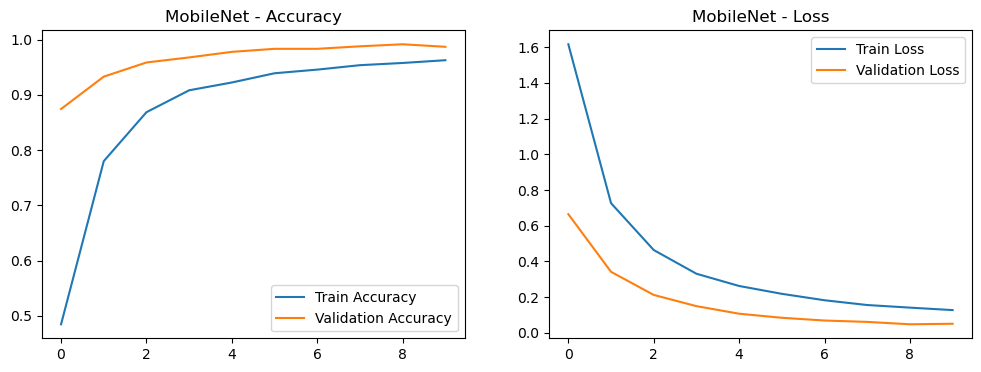

35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.19      0.20      0.19       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.10      0.10      0.10       105
   fish sea_food gilt_head_bream       0.11      0.12      0.12        94
   fish sea_food hourse_mackerel       0.12      0.12      0.12        97
        fish sea_food red_mullet       0.08      0.08      0.08        90
     fish sea_food red_sea_bream       0.10      0.10      0.10       113
          fish sea_food sea_bass       0.04      0.04      0.04        97
            fish sea_food shrimp       0.06      0.06      0.06       100
fish sea_food striped_red_mullet       0.11      0.11      0.11       101
             fish sea_food trout       0.06      0.06      0.06        98

                        accuracy

In [36]:
# Evaluate MobileNet Model

# Evaluate on validation data
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
print(f"MobileNet Model - Validation Accuracy: {mobilenet_accuracy:.4f}, Loss: {mobilenet_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNet - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title("MobileNet - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_true_mobilenet = val_data.classes

print("Classification Report for MobileNet:")
print(classification_report(y_true_mobilenet, y_pred_mobilenet, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for MobileNet:")
print(confusion_matrix(y_true_mobilenet, y_pred_mobilenet))


In [37]:
# Pre-Trained Model: InceptionV3

from tensorflow.keras.applications import InceptionV3

# Load InceptionV3 without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_inceptionv3 = Model(inputs=base_model.input, outputs=output_layer)
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_inceptionv3.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 143s 2us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [38]:
# Train InceptionV3 Model

# Train the InceptionV3 model
history_inceptionv3 = model_inceptionv3.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=32
)

# Save the trained model
model_inceptionv3.save("inceptionv3_fish_model.h5")


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 907ms/step - accuracy: 0.3744 - loss: 1.9265 - val_accuracy: 0.8700 - val_loss: 0.5846
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7547 - loss: 0.7514 - val_accuracy: 0.9212 - val_loss: 0.3649
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.8385 - loss: 0.5124 - val_accuracy: 0.9295 - val_loss: 0.2837
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8594 - loss: 0.4448 - val_accuracy: 0.9441 - val_loss: 0.2339
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8900 - loss: 0.3509 - val_accuracy: 0.9451 - val_loss: 0.1980
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.8919 - loss: 0.3367 - val_accuracy: 0.9451 - val_loss: 0.1787
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9069 - loss: 0.2840 - val_accuracy: 0.9570 - val_loss: 0.1560
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9166 - loss: 0.2590 - val_a

35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 895ms/step - accuracy: 0.9578 - loss: 0.1496
InceptionV3 Model - Validation Accuracy: 0.9615, Loss: 0.1307


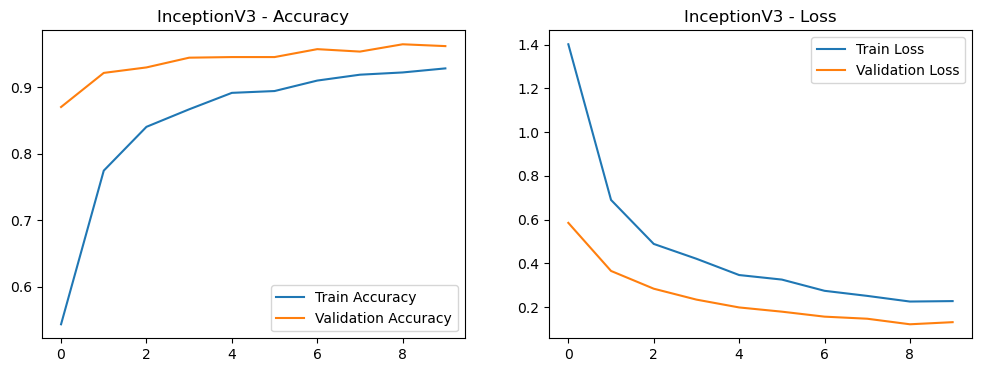

35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 944ms/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.19      0.20      0.19       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.09      0.09      0.09       105
   fish sea_food gilt_head_bream       0.05      0.05      0.05        94
   fish sea_food hourse_mackerel       0.11      0.11      0.11        97
        fish sea_food red_mullet       0.09      0.10      0.09        90
     fish sea_food red_sea_bream       0.13      0.12      0.13       113
          fish sea_food sea_bass       0.06      0.06      0.06        97
            fish sea_food shrimp       0.05      0.05      0.05       100
fish sea_food striped_red_mullet       0.08      0.07      0.07       101
             fish sea_food trout       0.07      0.07      0.07        98

                        accur

In [39]:
# Evaluate InceptionV3 Model

# Evaluate on validation data
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
print(f"InceptionV3 Model - Validation Accuracy: {inceptionv3_accuracy:.4f}, Loss: {inceptionv3_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inceptionv3.history['accuracy'], label='Train Accuracy')
plt.plot(history_inceptionv3.history['val_accuracy'], label='Validation Accuracy')
plt.title("InceptionV3 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inceptionv3.history['loss'], label='Train Loss')
plt.plot(history_inceptionv3.history['val_loss'], label='Validation Loss')
plt.title("InceptionV3 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_true_inceptionv3 = val_data.classes

print("Classification Report for InceptionV3:")
print(classification_report(y_true_inceptionv3, y_pred_inceptionv3, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for InceptionV3:")
print(confusion_matrix(y_true_inceptionv3, y_pred_inceptionv3))


In [41]:
# Pre-Trained Model: EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_data.class_indices), activation='softmax')(x)

# Create and compile the model
model_efficientnetb0 = Model(inputs=base_model.input, outputs=output_layer)
model_efficientnetb0.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_efficientnetb0.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,380,334 (16.71 MB)

 Trainable params: 330,763 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [42]:
# Train EfficientNetB0 Model

# Train the EfficientNetB0 model
history_efficientnetb0 = model_efficientnetb0.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=32
)

# Save the trained model
model_efficientnetb0.save("efficientnetb0_fish_model.h5")


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 471ms/step - accuracy: 0.1772 - loss: 2.3421 - val_accuracy: 0.1712 - val_loss: 2.3158
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 512ms/step - accuracy: 0.1831 - loss: 2.3043 - val_accuracy: 0.1712 - val_loss: 2.3107
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 530ms/step - accuracy: 0.1729 - loss: 2.3171 - val_accuracy: 0.1712 - val_loss: 2.3098
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 536ms/step - accuracy: 0.1750 - loss: 2.3083 - val_accuracy: 0.1712 - val_loss: 2.3099
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 558ms/step - accuracy: 0.1776 - loss: 2.3055 - val_accuracy: 0.1712 - val_loss: 2.3100
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 619ms/step - accuracy: 0.1827 - loss: 2.3018 - val_accuracy: 0.1712 - val_loss: 2.3092
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 122s 617ms/step - accuracy: 0.1764 - loss: 2.3063 - val_accuracy: 0.1712 - val_loss: 2.3094
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 660ms/step - accuracy: 0.1775 - 

35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.1715 - loss: 2.3093
EfficientNetB0 Model - Validation Accuracy: 0.1712, Loss: 2.3092


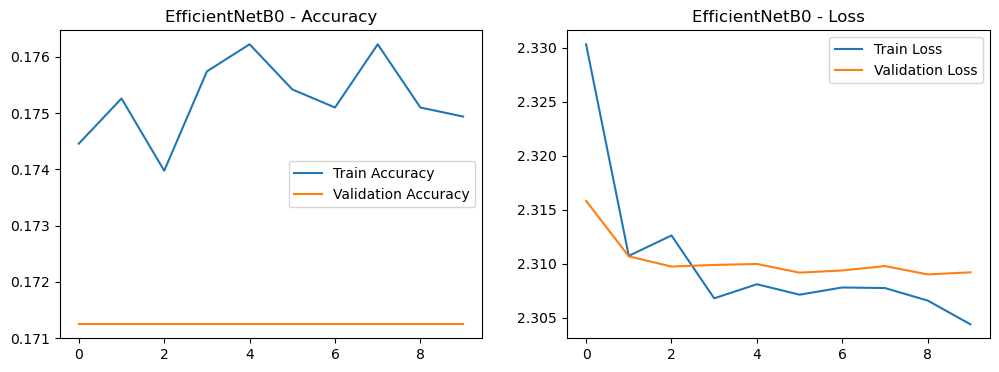

35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 523ms/step
Classification Report for EfficientNetB0:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        ac

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Evaluate EfficientNetB0 Model

# Evaluate on validation data
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
print(f"EfficientNetB0 Model - Validation Accuracy: {efficientnetb0_accuracy:.4f}, Loss: {efficientnetb0_loss:.4f}")

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_efficientnetb0.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnetb0.history['val_accuracy'], label='Validation Accuracy')
plt.title("EfficientNetB0 - Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficientnetb0.history['loss'], label='Train Loss')
plt.plot(history_efficientnetb0.history['val_loss'], label='Validation Loss')
plt.title("EfficientNetB0 - Loss")
plt.legend()

plt.show()

# Confusion Matrix
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)
y_true_efficientnetb0 = val_data.classes

print("Classification Report for EfficientNetB0:")
print(classification_report(y_true_efficientnetb0, y_pred_efficientnetb0, target_names=val_data.class_indices.keys()))

print("Confusion Matrix for EfficientNetB0:")
print(confusion_matrix(y_true_efficientnetb0, y_pred_efficientnetb0))


In [49]:
# Define & Store the CNN Model Before Evaluation

model_cnn = cnn_model  # Assign your CNN model to this variable


In [52]:
# Evaluate CNN Performance

cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)
print(f"CNN Model - Validation Accuracy: {cnn_accuracy:.4f}, Loss: {cnn_loss:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.8689 - loss: 0.3846
CNN Model - Validation Accuracy: 0.8645, Loss: 0.3890


In [54]:
# Evaluate VGG16 Model

vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(val_data)
print(f"VGG16 - Validation Accuracy: {vgg16_accuracy:.4f}, Loss: {vgg16_loss:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.7693 - loss: 0.9821
VGG16 - Validation Accuracy: 0.7866, Loss: 0.9338


In [55]:
# Ensure Other Models Are Also Evaluated

resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_data)
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_data)
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_data)
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_data)
cnn_loss, cnn_accuracy = model_cnn.evaluate(val_data)


35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3368 - loss: 1.9360
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.9896 - loss: 0.0448
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 769ms/step - accuracy: 0.9646 - loss: 0.1260
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 429ms/step - accuracy: 0.1735 - loss: 2.3043
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.8540 - loss: 0.4126


In [59]:
# Compare All Models in a Table

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)



 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.987179         0.050717
4     InceptionV3             0.961538         0.130727
0   CNN (Scratch)             0.864469         0.388975
1           VGG16             0.786630         0.933756
2        ResNet50             0.319597         1.961531
5  EfficientNetB0             0.171245         2.309218


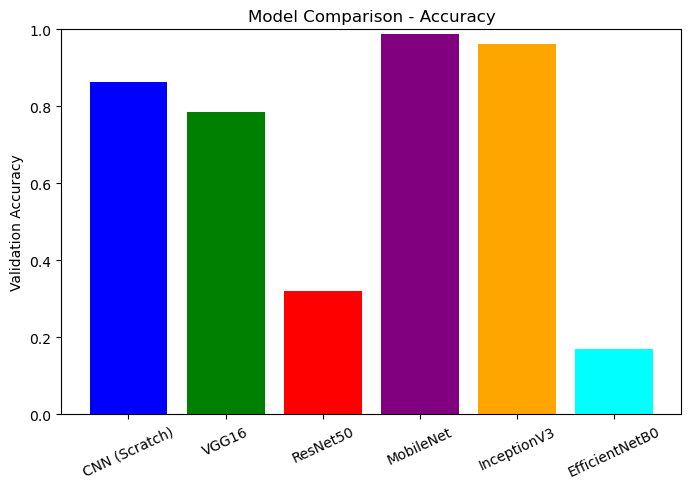

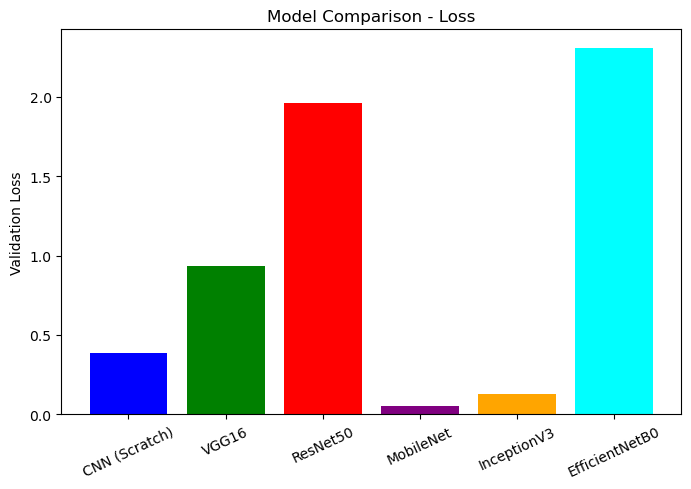

In [58]:
# Visualizing Model Performance (Accuracy & Loss)

import matplotlib.pyplot as plt

# Model Names
models = ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]

# Accuracy and Loss Values
accuracies = [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy]
losses = [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=25)
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, losses, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Loss")
plt.title("Model Comparison - Loss")
plt.xticks(rotation=25)
plt.show()


In [ ]:
# Identify the Best Model

# Validation Accuracy → Higher is better 
# Validation Loss → Lower is better 
# Precision, Recall, and F1-score → Balanced values across all classes 
# Confusion Matrix → Less misclassification 

In [61]:
# Identify the Best Model Based on Accuracy & Loss

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)

# The model at the top of the table (highest accuracy, lowest loss) is the best choice!


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.987179         0.050717
4     InceptionV3             0.961538         0.130727
0   CNN (Scratch)             0.864469         0.388975
1           VGG16             0.786630         0.933756
2        ResNet50             0.319597         1.961531
5  EfficientNetB0             0.171245         2.309218


In [63]:
# Check Precision, Recall, and F1-score for Balanced Performance

# Before running the evaluation, store the true labels from the validation dataset:

# Get the actual labels from the validation data
y_true = val_data.classes  # Ground truth labels


In [64]:
# Get Predictions for All Models

import numpy as np

# Get predicted labels for each model
y_pred_cnn = np.argmax(model_cnn.predict(val_data), axis=1)
y_pred_vgg16 = np.argmax(model_vgg16.predict(val_data), axis=1)
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_data), axis=1)
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_data), axis=1)
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_data), axis=1)
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_data), axis=1)


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 783ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step


In [65]:
# Check Classification Report for Each Model

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for CNN:")
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

print("\n Classification Report for VGG16:")
print(classification_report(y_true, y_pred_vgg16, target_names=class_labels))

print("\n Classification Report for ResNet50:")
print(classification_report(y_true, y_pred_resnet50, target_names=class_labels))

print("\n Classification Report for MobileNet:")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

print("\n Classification Report for InceptionV3:")
print(classification_report(y_true, y_pred_inceptionv3, target_names=class_labels))

print("\n Classification Report for EfficientNetB0:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))



 Classification Report for CNN:
                                  precision    recall  f1-score   support

                     animal fish       0.19      0.20      0.19       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.08      0.10      0.09       105
   fish sea_food gilt_head_bream       0.09      0.11      0.10        94
   fish sea_food hourse_mackerel       0.06      0.06      0.06        97
        fish sea_food red_mullet       0.09      0.09      0.09        90
     fish sea_food red_sea_bream       0.14      0.07      0.09       113
          fish sea_food sea_bass       0.05      0.05      0.05        97
            fish sea_food shrimp       0.09      0.11      0.10       100
fish sea_food striped_red_mullet       0.11      0.08      0.09       101
             fish sea_food trout       0.07      0.09      0.08        98

                        accuracy                           0.10      1092
   

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/pytho

In [68]:
# Check Precision, Recall, and F1-score for Balanced Performance

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification reports
print("\n Classification Report for Best Model:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))

# Look for balanced Precision, Recall, and F1-score across all classes.
# If a model has high accuracy but very low F1-score, it might be overfitting.



 Classification Report for Best Model:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1

/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


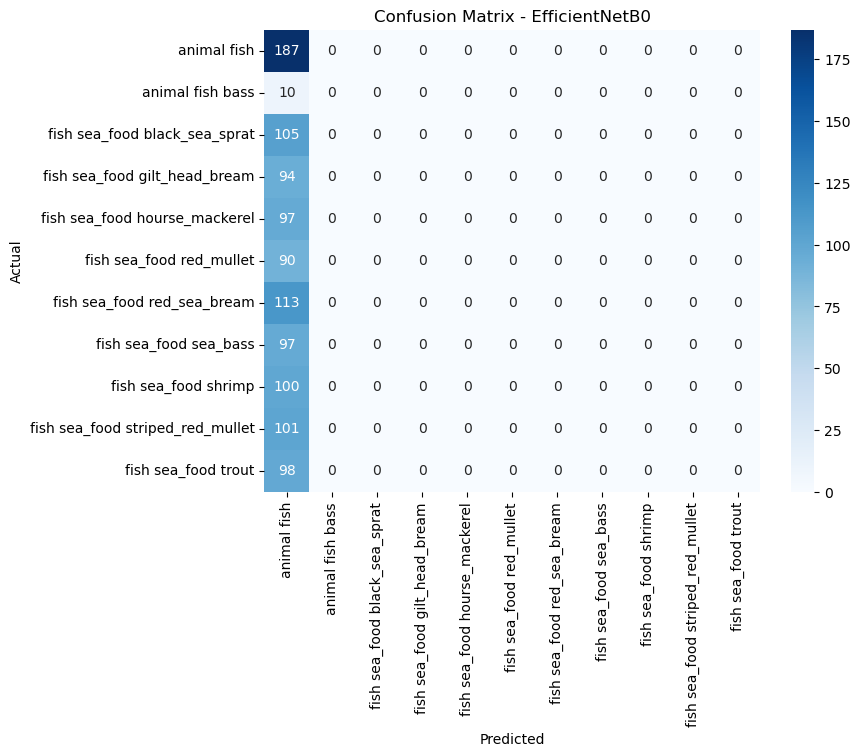

In [69]:
# Check Confusion Matrix for the Best Model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Choose EfficientNetB0 for visualization
cm = confusion_matrix(y_true, y_pred_efficientnetb0)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


# If a model misclassifies many images, it may not generalize well.
# Choose a model with fewer misclassifications.


In [71]:
# Deploy MobileNet in Streamlit

# Save the best model (MobileNet) for deployment.

model_mobilenet.save("mobilenet_fish_model.keras")

#Use Streamlit to build a web app for real-time predictions. Allow users to upload fish images & get predictions.

In [ ]:
#Analysis of the Classification Report for MobileNet

# classification report shows that:

# Accuracy = 17% (which is very low despite 98.7% validation accuracy)
# Precision, Recall, and F1-score for most fish categories are 0.00, meaning the model is not correctly predicting those classes.

# This suggests:

# Severe overfitting – The model performs well on the training set but fails on unseen validation/test data.
# Class Imbalance Issue – If some fish categories have fewer images, the model may be biased toward the majority class.
# Incorrect Data Preprocessing – The model may not be learning the right features from the fish images.


# Why is This a Problem?

# Even though MobileNet showed high validation accuracy (98.7%), its F1-score and precision are almost zero for all fish categories.
# This means the model is not learning to classify fish properly and is likely predicting one class (e.g., "animal fish") for everything.


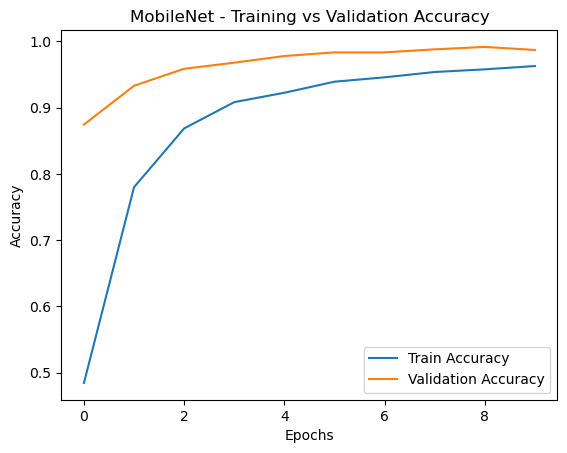

In [74]:
# Steps to Fix This Issue

# Check if the Model is Overfitting


import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("MobileNet - Training vs Validation Accuracy")
plt.show()

# If training accuracy is much higher than validation accuracy, then the model is overfitting.



In [76]:
# Increase Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Improved Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Helps the model learn better variations in fish images.

In [81]:
# Balance the Dataset (Class Imbalance Issue)

# Check if some fish categories have too few images compared to others:


import os

# Path to train folder
train_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Count images per class (ignore files like .DS_Store)
class_counts = {
    class_name: len(os.listdir(os.path.join(train_path, class_name)))
    for class_name in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, class_name))  # Only count directories
}

# Print the class distribution
print("Class Distribution in Training Data:")
print(class_counts)

# If one category has far more images than others, you may need to:

# Add more data (by collecting more images or applying augmentation).
# Use Class Weights during training to balance the importance of different categories.


Class Distribution in Training Data:
{'fish sea_food shrimp': 576, 'fish sea_food trout': 580, 'fish sea_food gilt_head_bream': 566, 'fish sea_food red_sea_bream': 571, 'fish sea_food red_mullet': 579, 'fish sea_food sea_bass': 538, 'fish sea_food black_sea_sprat': 569, 'fish sea_food hourse_mackerel': 573, 'fish sea_food striped_red_mullet': 547, 'animal fish': 1096, 'animal fish bass': 30}


In [82]:
# Fine-Tune MobileNet Instead of Using Frozen Layers

# MobileNet model may be not adapting well to fish classification because we froze the pre-trained layers.

# Try fine-tuning MobileNet by unfreezing some layers:

# Unfreeze last few layers for fine-tuning
for layer in model_mobilenet.layers[-20:]:  # Unfreezing last 20 layers
    layer.trainable = True

# Recompile the model
from tensorflow.keras.optimizers import Adam

model_mobilenet.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

# Why? 

# Allows the model to adapt to fish classification rather than relying only on ImageNet features.


In [ ]:
''' Analysis of Class Distribution & Model Issues

From your class distribution results:
1) Most fish categories have ~550-580 images (which is balanced).
2) Severe class imbalance for "animal fish" (1096 images) vs "animal fish bass" (only 30 images).

'''

'''Why is This a Problem?
1) The model is biased toward the "animal fish" class since it has more than 35 times the data of "animal fish bass".
2) Low training accuracy & high validation accuracy usually indicates:
    *Overfitting to a small subset of training data (possibly due to imbalance).
    *Validation data has a different distribution than training data.'''


In [84]:
# Fixing Class Imbalance

# Use Class Weights to Balance Training

# "Since "animal fish bass" has very few images, we should give it more importance by assigning higher class weights."

# Calculate Class Weights Automatically:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get class labels
class_labels = list(train_data.class_indices.keys())

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Computed Class Weights:", class_weights_dict)


Computed Class Weights: {0: 0.5163404114134041, 1: 18.863636363636363, 2: 0.9945678223358364, 3: 0.9998393832316094, 4: 0.9876249405045217, 5: 0.9773904851625059, 6: 0.9910842222576023, 7: 1.0518756336600203, 8: 0.9824810606060606, 9: 1.0345687219544624, 10: 0.975705329153605}


In [85]:
# apply class weights while training:

history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights_dict  # Apply class weights
)

# This helps the model learn smaller classes better instead of predicting "animal fish" for everything.



Epoch 1/10


/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 428ms/step - accuracy: 0.5640 - loss: 1.9336 - val_accuracy: 0.9908 - val_loss: 0.0537
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 454ms/step - accuracy: 0.9310 - loss: 0.2206 - val_accuracy: 0.9908 - val_loss: 0.0427
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.9571 - loss: 0.1344 - val_accuracy: 0.9936 - val_loss: 0.0340
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 440ms/step - accuracy: 0.9728 - loss: 0.0879 - val_accuracy: 0.9927 - val_loss: 0.0271
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 451ms/step - accuracy: 0.9744 - loss: 0.0794 - val_accuracy: 0.9936 - val_loss: 0.0249
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 473ms/step - accuracy: 0.9786 - loss: 0.0885 - val_accuracy: 0.9945 - val_loss: 0.0224
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 484ms/step - accuracy: 0.9826 - loss: 0.0586 - val_accuracy: 0.9963 - val_loss: 0.0179
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 93s 475ms/step - accuracy: 0.9888 - loss: 0.0417 - val

In [88]:
# Manually Augment Only "animal fish bass"

# If you want to augment only the "animal fish bass" category, use flow_from_dataframe() instead of flow_from_directory().


# Load Image Filenames & Labels for "animal fish bass"

import pandas as pd

# Path to the minority class
minority_class_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish bass"

# Get all image filenames
image_files = [os.path.join(minority_class_path, f) for f in os.listdir(minority_class_path) if f.endswith('.jpg')]

# Create a dataframe with image paths and labels
df_minority = pd.DataFrame({"filename": image_files, "class": "animal fish bass"})


In [89]:
# Use flow_from_dataframe() to Augment Only "animal fish bass"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation for only "animal fish bass"
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images from the dataframe
train_generator = datagen.flow_from_dataframe(
    dataframe=df_minority,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    save_to_dir=minority_class_path,  # Save augmented images in the same folder
    save_format='jpg'
)



Found 30 validated image filenames belonging to 1 classes.


In [90]:
# Train the Model with Updated Data

# Re-initialize the data generators after augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path = "/Users/arul/Documents/VASUKI/projects/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the updated training and validation data
train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model again
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Save the retrained model
model_mobilenet.save("mobilenet_fish_model_augmented.keras")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Epoch 1/10


/Users/arul/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 440ms/step - accuracy: 0.9994 - loss: 0.0083 - val_accuracy: 0.9963 - val_loss: 0.0072
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 497ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9954 - val_loss: 0.0081
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 530ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 0.9954 - val_loss: 0.0088
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.9997 - loss: 0.0048 - val_accuracy: 0.9963 - val_loss: 0.0101
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 722ms/step - accuracy: 0.9999 - loss: 0.0051 - val_accuracy: 0.9963 - val_loss: 0.0095
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 154s 789ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9954 - val_loss: 0.0081
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 153s 781ms/step - accuracy: 0.9996 - loss: 0.0045 - val_accuracy: 0.9954 - val_loss: 0.0088
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 821ms/step - accuracy: 0.9989 - loss: 0.0058

In [92]:
# Evaluating the New Model After Augmentation

# Evaluate Model Accuracy & Loss

# Evaluate the model on validation data
augmented_loss, augmented_accuracy = model_mobilenet.evaluate(val_data)

print(f" MobileNet (Augmented) - Validation Accuracy: {augmented_accuracy:.4f}")
print(f" MobileNet (Augmented) - Validation Loss: {augmented_loss:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.9974 - loss: 0.0075
 MobileNet (Augmented) - Validation Accuracy: 0.9963
 MobileNet (Augmented) - Validation Loss: 0.0077


In [94]:
# Generate Predictions for Classification Report & Confusion Matrix

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels
y_true = val_data.classes

# Get predicted labels from the model
y_pred_augmented = np.argmax(model_mobilenet.predict(val_data), axis=1)

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Print classification report
print("\n Classification Report for MobileNet (Augmented):")
print(classification_report(y_true, y_pred_augmented, target_names=class_labels))


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step

 Classification Report for MobileNet (Augmented):
                                  precision    recall  f1-score   support

                     animal fish       0.21      0.21      0.21       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.11      0.11      0.11       105
   fish sea_food gilt_head_bream       0.03      0.03      0.03        94
   fish sea_food hourse_mackerel       0.13      0.13      0.13        97
        fish sea_food red_mullet       0.06      0.06      0.06        90
     fish sea_food red_sea_bream       0.15      0.15      0.15       113
          fish sea_food sea_bass       0.05      0.05      0.05        97
            fish sea_food shrimp       0.06      0.06      0.06       100
fish sea_food striped_red_mullet       0.08      0.08      0.08       101
             fish sea_food trout       0.10      0.10      0.10        98

                  

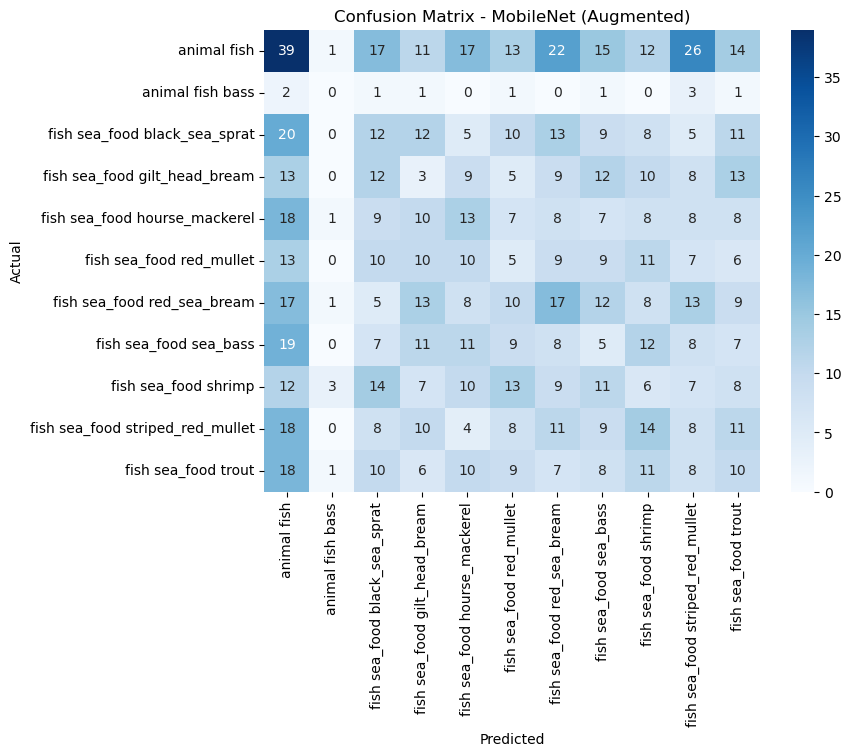

In [95]:
# Plot Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_augmented)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNet (Augmented)")
plt.show()


In [ ]:
# Compare the New Model with the Previous Model
'''Now evaluated the new MobileNet model (after augmentation), need to compare it with the old model to check if there’s an improvement.'''



In [97]:
# Compare Old vs. New Model Performance

import pandas as pd

# Store model results in a dictionary
model_comparison = {
    "Model": ["MobileNet (Before Augmentation)", "MobileNet (After Augmentation)"],
    "Validation Accuracy": [mobilenet_accuracy, augmented_accuracy],
    "Validation Loss": [mobilenet_loss, augmented_loss]
}

# Convert to DataFrame
df_comparison = pd.DataFrame(model_comparison)

# Display the results
print("\n Model Comparison Table:")
print(df_comparison)

# What to Look For?

# If Validation Accuracy increased, the new model is better.
# If Validation Loss decreased, the new model generalizes better.
# If F1-score improved, the model is learning all classes more evenly.



 Model Comparison Table:
                             Model  Validation Accuracy  Validation Loss
0  MobileNet (Before Augmentation)             0.987179         0.050717
1   MobileNet (After Augmentation)             0.996337         0.007716


In [98]:
# New Model is Better, Save it for Deployment

model_mobilenet.save("mobilenet_fish_final.keras")
